<a href="https://colab.research.google.com/github/teenylasers/mousenets/blob/master/mnist1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Classification using Fully Connected Neural Nets

This follows the same neural nets as implemented in [mnist0.ipynb](https://colab.research.google.com/drive/1gmXteU_qhI1RP6CDhEoHFcSK_MsYfqZX?authuser=1#scrollTo=Iaxyao85dvcX), but using Keras API for loading data only. The construction and training of the neural nets are custom implementations herein. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Load the MNIST dataset. 

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test: uint8 arrays of grayscale image data with shapes  (num_samples, 28, 28).  
# y_train, y_test: uint8 arrays of digit labels (integers in range 0-9) with shapes (num_samples,).  
print('x_train (training data) dimensions: ', x_train.shape)
print('x_test (test data) dimensions: ', x_test.shape)
print('y_train (training labels) dimensions: ', y_train.shape)
print('y_test (test labels) dimensions: ', y_test.shape)

# Reshape 2D input images into 1D vectors.
image_vector_length = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0],image_vector_length)
x_test = x_test.reshape(x_test.shape[0], image_vector_length)
print('x_train reshaped dimensions: ', x_train.shape)
print('x_test reshaped dimensions: ', x_test.shape)

# Transform output training label into one-hot encoded vectors.
num_classes = 10;
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train (training data) dimensions:  (60000, 28, 28)
x_test (test data) dimensions:  (10000, 28, 28)
y_train (training labels) dimensions:  (60000,)
y_test (test labels) dimensions:  (10000,)
x_train reshaped dimensions:  (60000, 784)
x_test reshaped dimensions:  (10000, 784)


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd drive/My\ Drive/mousenets/mnist
%ls

Mounted at /content/drive
/content/drive/My Drive/mousenets/mnist
__init__.py  mlp.py  mnist0.ipynb  mnist1.ipynb  __pycache__/


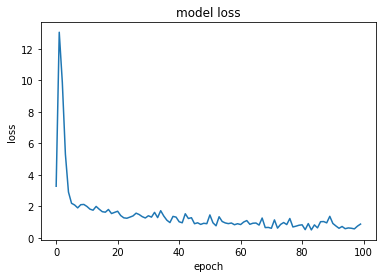

In [8]:
from mlp import *

# Construct the MLP
l1_width = 32 # the first layer has 32 nodes
l2_width = 10 # the second and output layer has 10 nodes
mlp = MLP(input_dimension = image_vector_length, output_dimension = num_classes)
mlp.add_layer(l1_width, 'sigmoid')
mlp.add_layer(l2_width, 'softmax')
mlp.define_loss_function('cce')

# Train the MLP using sgd
trainer = NetTrainer()
mlp, loss_history = trainer.sgd(mlp, x_train, y_train, epochs=100, batch_size=32)

plt.plot(loss_history)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [9]:
# Evaluate the trained MLP
eval_results = trainer.evaluate(mlp, x_test, y_test)
print('Validation loss = ', eval_results)

Validation loss =  (0.7647, 0.7464954344032262)
